# Laptop Price Prediction Using Regression Models in Machine Learning

**1. Problem Statement**

We will make a project for Laptop price prediction. The problem statement is that if any user wants to buy a laptop then our application should be compatible to provide a tentative price of laptop according to the user configurations. Although it looks like a simple project or just developing a model, the dataset we have is noisy and needs lots of feature engineering, and preprocessing that will drive your interest in developing this project.

# Outline of the Project (Steps)

--Load and inspect data

--Clean and preprocess data

--Feature engineering (optional)

--Encoding categorical variables

--Feature scaling

--Split data into training/testing

--Train models

--Predict and evaluate

--hyperparameters

--Compare results and conclude

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and inspect data

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
df1 = pd.read_csv("/content/drive/MyDrive/DataSets/laptop_price.csv",encoding='latin-1')
df1

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#Copy a data
df = df1.copy()
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#size
df.size

16939

In [ ]:
#shape
df.shape

(1303, 13)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
#summary statistics
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


#Clean and preprocess data

In [ ]:
#for missing values
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
#Data Types and Conversion
#Check if Ram, Weight columns are strings (like "8GB", "1.37kg"). We will convert them.
#Convert 'Ram' and 'Weight' to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [ ]:
df.nunique()

,0
laptop_ID,1303
Company,19
Product,618
TypeName,6
Inches,18
ScreenResolution,40
Cpu,118
Ram,9
Memory,39
Gpu,110


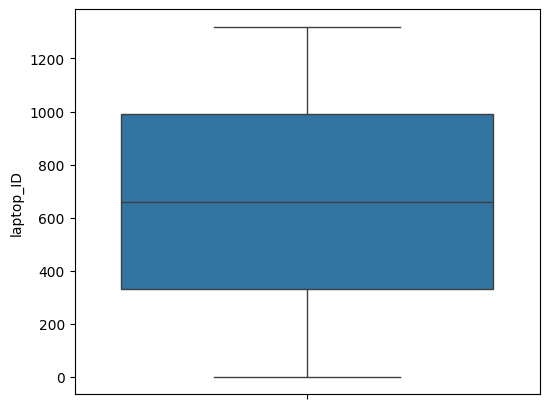

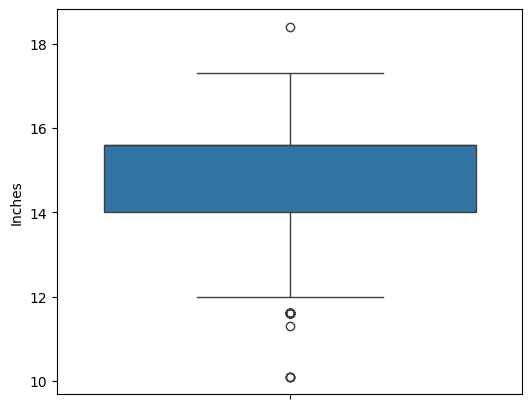

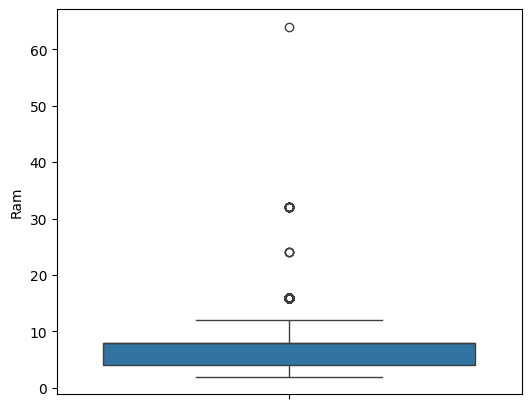

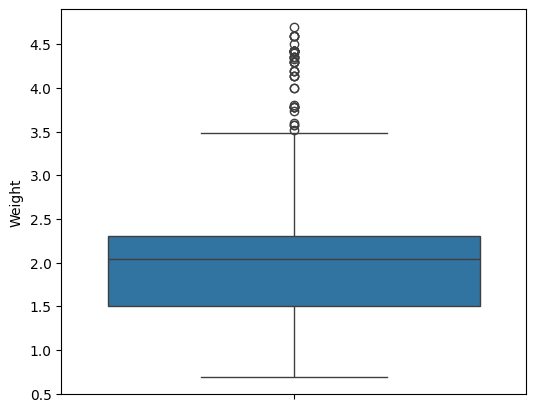

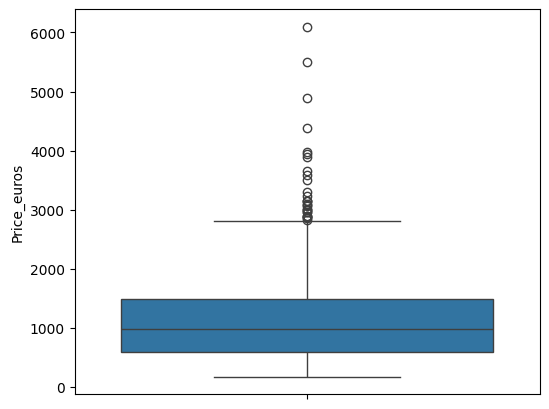

In [ ]:
#outliers
for column in df.select_dtypes(include=["number"]).columns:
  plt.figure(figsize=(6,5))
  sns.boxplot(y=df[column])

In [ ]:
cols=[ 'Ram','Weight','Inches','Price_euros']

numeric_cols=df.select_dtypes(include='number').columns

for cols in df.select_dtypes(include='number').columns:
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.15*iqr
  upper_bound=q3+1.15*iqr
  df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)

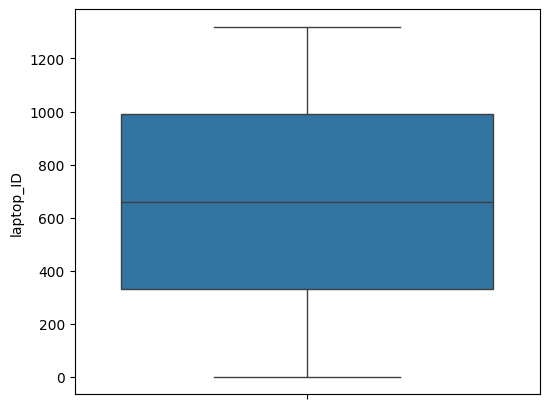

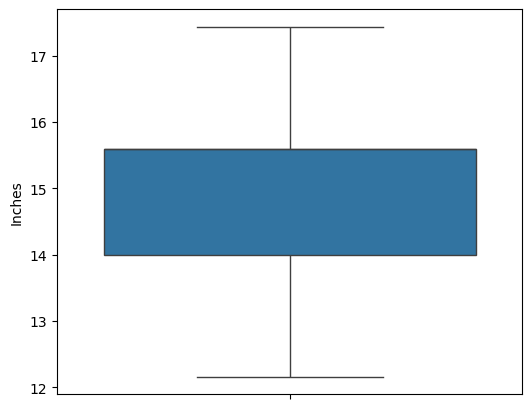

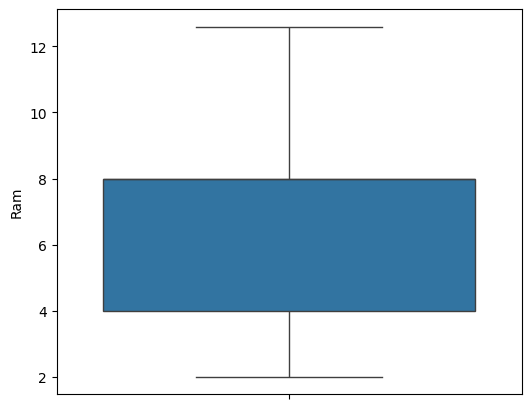

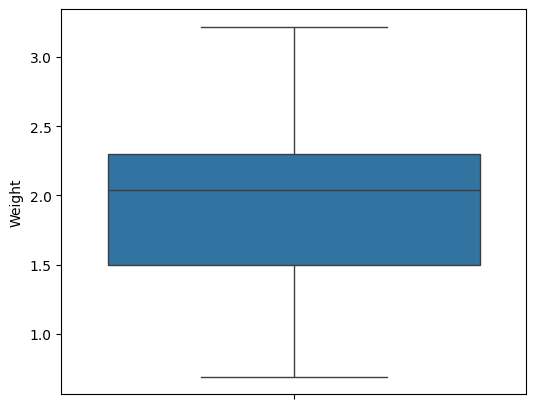

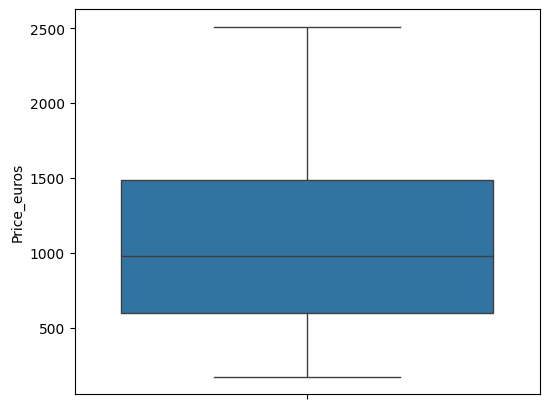

In [ ]:
for column in df.select_dtypes(include=["number"]).columns:
  plt.figure(figsize=(6,5))
  sns.boxplot(y=df[column])

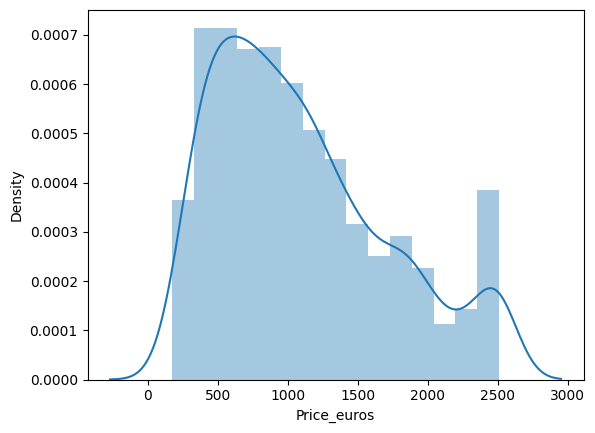

In [ ]:
#Plots
#Distplot
sns.distplot(df['Price_euros'])
plt.show()

 What it does:

Plots a histogram (bars showing how many laptops are in each price range)

Adds a smooth curved line (KDE – shows price trend)

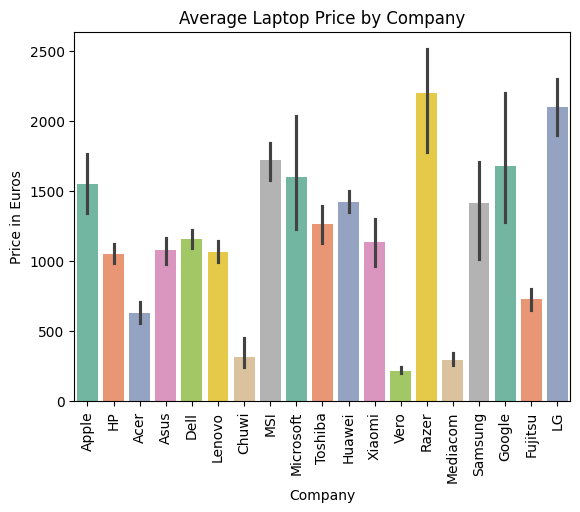

In [ ]:
#what is avg price of each brand?
#Barplot
sns.barplot(x=df['Company'], y=df['Price_euros'], palette="Set2")
plt.xticks(rotation="vertical")
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Price in Euros")
plt.show()

Insights:

Apple and some brands have high prices 💰

HP, Dell, Lenovo are in the middle 💻

Acer or others are usually cheaper 🪙

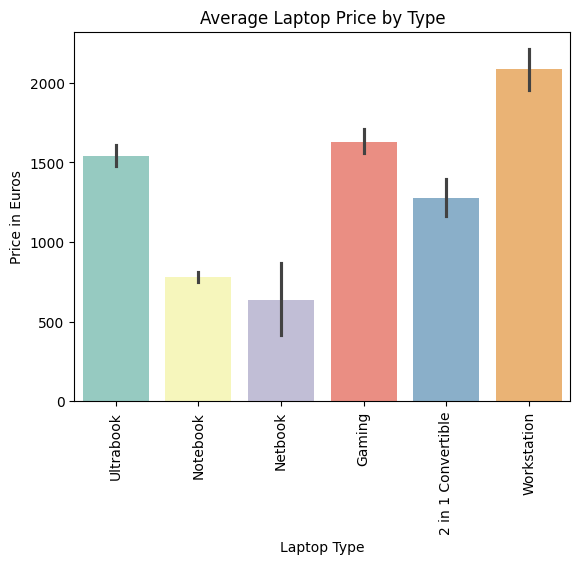

In [ ]:
#Barplot
sns.barplot(x=df['TypeName'], y=df['Price_euros'], palette='Set3')
plt.xticks(rotation="vertical")
plt.title("Average Laptop Price by Type")
plt.xlabel("Laptop Type")
plt.ylabel("Price in Euros")
plt.show()

Insights:

Gaming and Workstation laptops are the most expensive 💰

Ultrabook and 2 in 1 Convertible are moderately priced 💼

Notebook and Netbook are the cheapest 🪙

<Axes: xlabel='Inches', ylabel='Price_euros'>

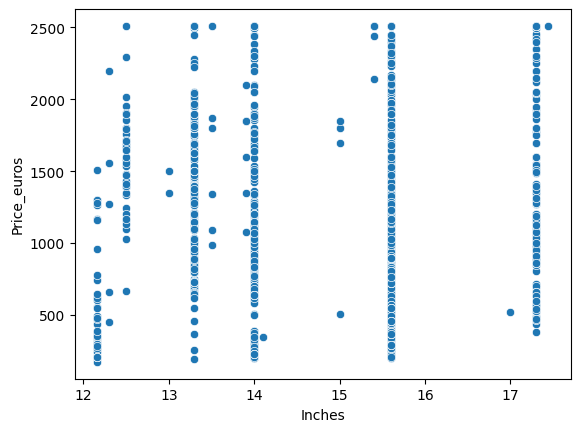

In [ ]:
#Scatterplot
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

Insights:

Most laptops are around 13 to 15 inches.

Very small (11") or very large (17"+) screens are less common.

No strong pattern: Bigger screen doesn't always mean higher price.

Some expensive laptops have both small and large screens, meaning other features also affect price.

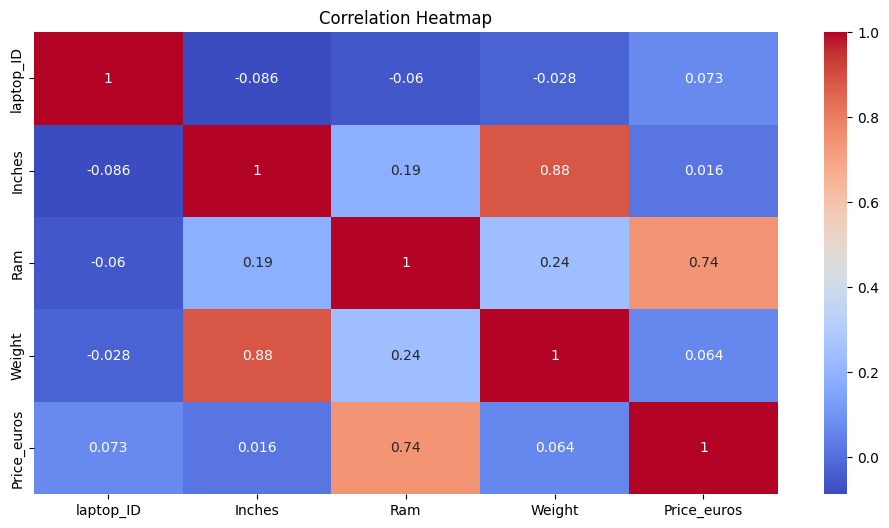

In [ ]:
#Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

RAM is usually the most related to laptop price.

Other features like weight, screen size might have little or no effect.

Helps you know which features are important for predicting price.

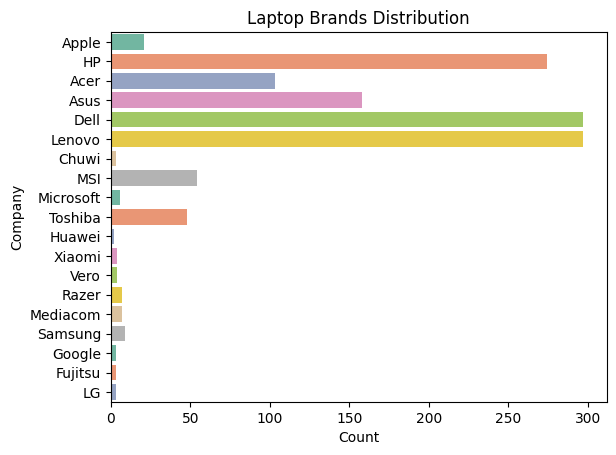

In [ ]:
#Countplot
sns.countplot(y='Company', data=df, palette='Set2')
plt.title("Laptop Brands Distribution")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()

Some brands like HP, Dell, and Lenovo have more laptops in the data

Brands like Razer or Google have fewer laptops

This shows which companies have more models available in the dataset.

#Feature Engineering

In [ ]:
import re
def get_cpu_type(cpu):
    cpu = cpu.lower()
    if 'intel' in cpu:
        if 'i3' in cpu:
            return 'Intel i3'
        elif 'i5' in cpu:
            return 'Intel i5'
        elif 'i7' in cpu:
            return 'Intel i7'
        elif 'i9' in cpu:
            return 'Intel i9'
        elif 'pentium' in cpu:
            return 'Intel Pentium'
        elif 'celeron' in cpu:
            return 'Intel Celeron'
        elif 'atom' in cpu:
            return 'Intel Atom'
        else:
            return 'Intel Other'
    elif 'amd' in cpu:
        if 'ryzen 3' in cpu:
            return 'AMD Ryzen 3'
        elif 'ryzen 5' in cpu:
            return 'AMD Ryzen 5'
        elif 'ryzen 7' in cpu:
            return 'AMD Ryzen 7'
        elif 'a9' in cpu:
            return 'AMD A9'
        elif 'a10' in cpu:
            return 'AMD A10'
        elif 'e2' in cpu:
            return 'AMD E2'
        else:
            return 'AMD Other'
    else:
        return 'Other'

def extract_cpu_speed(cpu_str):
    match = re.search(r"(\d+(\.\d+)?)\s*GHz", cpu_str)
    return float(match.group(1)) if match else None

df['Cpu_Type'] = df['Cpu'].apply(get_cpu_type)
df['Cpu_Speed_GHz'] = df['Cpu'].apply(extract_cpu_speed)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.690,Intel i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.940,Intel i5,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.000,Intel i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2510.092,Intel i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.600,Intel i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.000,Intel i7,2.5
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.000,Intel i7,2.5
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.000,Intel Celeron,1.6
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.000,Intel i7,2.5


To group CPUs like Intel i3, Intel i5, AMD Ryzen 5, etc. into clean categories.

In [ ]:
#Check if laptop is Touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.690,Intel i5,2.3,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.940,Intel i5,1.8,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.000,Intel i5,2.5,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2510.092,Intel i7,2.7,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.600,Intel i5,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.000,Intel i7,2.5,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.000,Intel i7,2.5,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.000,Intel Celeron,1.6,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.000,Intel i7,2.5,0


 Why?
Adds a new column:

1 → Laptop has touchscreen

0 → No touchscreen

In [ ]:
#Check for IPS display
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.690,Intel i5,2.3,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.940,Intel i5,1.8,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.000,Intel i5,2.5,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2510.092,Intel i7,2.7,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.600,Intel i5,3.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.000,Intel i7,2.5,1,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.000,Intel i7,2.5,1,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.000,Intel Celeron,1.6,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.000,Intel i7,2.5,0,0


 Why?
Adds a new column:

1 → Laptop has IPS display

0 → No IPS display

In [ ]:
#Extract screen resolution (X × Y pixels)
def extract_resolution(s):
    match = re.search(r'(\d+)x(\d+)', s);
    return (int(match.group(1)), int(match.group(2))) if match else (0, 0)

df['Resolution'] = df['ScreenResolution'].apply(extract_resolution)
df['X_res'] = df['Resolution'].apply(lambda x: x[0])
df['Y_res'] = df['Resolution'].apply(lambda x: x[1])
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen,IPS,Resolution,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.690,Intel i5,2.3,0,1,"(2560, 1600)",2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.940,Intel i5,1.8,0,0,"(1440, 900)",1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.000,Intel i5,2.5,0,0,"(1920, 1080)",1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2510.092,Intel i7,2.7,0,1,"(2880, 1800)",2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.600,Intel i5,3.1,0,1,"(2560, 1600)",2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.000,Intel i7,2.5,1,1,"(1920, 1080)",1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.000,Intel i7,2.5,1,1,"(3200, 1800)",3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.000,Intel Celeron,1.6,0,0,"(1366, 768)",1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.000,Intel i7,2.5,0,0,"(1366, 768)",1366,768


Why?

To get the screen width (X_res) and height (Y_res) in pixels, e.g., 1920 x 1080.

In [ ]:
#Calculate PPI (Pixels Per Inch)
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).round(2)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen,IPS,Resolution,X_res,Y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,...,1.37,1339.690,Intel i5,2.3,0,1,"(2560, 1600)",2560,1600,226.98
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.940,Intel i5,1.8,0,0,"(1440, 900)",1440,900,127.68
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,...,1.86,575.000,Intel i5,2.5,0,0,"(1920, 1080)",1920,1080,141.21
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,...,1.83,2510.092,Intel i7,2.7,0,1,"(2880, 1800)",2880,1800,220.53
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,...,1.37,1803.600,Intel i5,3.1,0,1,"(2560, 1600)",2560,1600,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,...,1.80,638.000,Intel i7,2.5,1,1,"(1920, 1080)",1920,1080,157.35
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,...,1.30,1499.000,Intel i7,2.5,1,1,"(3200, 1800)",3200,1800,276.05
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,...,1.50,229.000,Intel Celeron,1.6,0,0,"(1366, 768)",1366,768,111.94
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,...,2.19,764.000,Intel i7,2.5,0,0,"(1366, 768)",1366,768,100.45


Why?

To measure screen sharpness — higher PPI = sharper screen.

In [ ]:
#Extract GPU Brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen,IPS,Resolution,X_res,Y_res,PPI,Gpu_Brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,...,1339.690,Intel i5,2.3,0,1,"(2560, 1600)",2560,1600,226.98,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,...,898.940,Intel i5,1.8,0,0,"(1440, 900)",1440,900,127.68,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,...,575.000,Intel i5,2.5,0,0,"(1920, 1080)",1920,1080,141.21,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,...,2510.092,Intel i7,2.7,0,1,"(2880, 1800)",2880,1800,220.53,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,...,1803.600,Intel i5,3.1,0,1,"(2560, 1600)",2560,1600,226.98,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,...,638.000,Intel i7,2.5,1,1,"(1920, 1080)",1920,1080,157.35,Intel
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,...,1499.000,Intel i7,2.5,1,1,"(3200, 1800)",3200,1800,276.05,Intel
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,...,229.000,Intel Celeron,1.6,0,0,"(1366, 768)",1366,768,111.94,Intel
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,...,764.000,Intel i7,2.5,0,0,"(1366, 768)",1366,768,100.45,AMD


Why?

Gets GPU brand like Nvidia, Intel, AMD from full text like "Nvidia GeForce GTX".

In [ ]:
#Split 'Memory' column into separate types (HDD, SSD, etc.)
def split_memory(mem):
    mem = mem.replace('GB', '').replace('TB', '000').split('+')
    total = {'HDD': 0, 'SSD': 0, 'Flash': 0, 'Hybrid': 0}
    for part in mem:
        if 'HDD' in part: total['HDD'] += int(re.findall(r'\d+', part)[0])
        elif 'SSD' in part: total['SSD'] += int(re.findall(r'\d+', part)[0])
        elif 'Flash' in part: total['Flash'] += int(re.findall(r'\d+', part)[0])
        elif 'Hybrid' in part: total['Hybrid'] += int(re.findall(r'\d+', part)[0])
    return pd.Series(total)
df[['HDD', 'SSD', 'Flash', 'Hybrid']] = df['Memory'].apply(split_memory)
df[['Memory', 'HDD', 'SSD', 'Flash', 'Hybrid']].head()

,Memory,HDD,SSD,Flash,Hybrid
0,128GB SSD,0,128,0,0
1,128GB Flash Storage,0,0,128,0
2,256GB SSD,0,256,0,0
3,512GB SSD,0,512,0,0
4,256GB SSD,0,256,0,0


Why?

To separate storage into types:

Example: "256GB SSD + 1TB HDD" → SSD = 256, HDD = 1000, others = 0
Makes it easy to train models.



In [ ]:
df = df.drop(columns=['laptop_ID', 'Product', 'ScreenResolution', 'Cpu', 'Gpu', 'Memory', 'Resolution'])
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Cpu_Type,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,Gpu_Brand,HDD,SSD,Flash,Hybrid
0,Apple,Ultrabook,13.3,8.0,macOS,1.37,1339.690,Intel i5,2.3,0,1,2560,1600,226.98,Intel,0,128,0,0
1,Apple,Ultrabook,13.3,8.0,macOS,1.34,898.940,Intel i5,1.8,0,0,1440,900,127.68,Intel,0,0,128,0
2,HP,Notebook,15.6,8.0,No OS,1.86,575.000,Intel i5,2.5,0,0,1920,1080,141.21,Intel,0,256,0,0
3,Apple,Ultrabook,15.4,12.6,macOS,1.83,2510.092,Intel i7,2.7,0,1,2880,1800,220.53,AMD,0,512,0,0
4,Apple,Ultrabook,13.3,8.0,macOS,1.37,1803.600,Intel i5,3.1,0,1,2560,1600,226.98,Intel,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,638.000,Intel i7,2.5,1,1,1920,1080,157.35,Intel,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,12.6,Windows 10,1.30,1499.000,Intel i7,2.5,1,1,3200,1800,276.05,Intel,0,512,0,0
1300,Lenovo,Notebook,14.0,2.0,Windows 10,1.50,229.000,Intel Celeron,1.6,0,0,1366,768,111.94,Intel,0,0,64,0
1301,HP,Notebook,15.6,6.0,Windows 10,2.19,764.000,Intel i7,2.5,0,0,1366,768,100.45,AMD,1000,0,0,0


#Encoding

In [ ]:
# Apply One-Hot Encoding
categorical_columns = ['Company', 'TypeName', 'OpSys', 'Gpu_Brand','Cpu_Type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the result
print(df_encoded.shape)
df_encoded.head()

(1303, 59)


,Inches,Ram,Weight,Price_euros,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,...,Cpu_Type_AMD E2,Cpu_Type_AMD Other,Cpu_Type_Intel Atom,Cpu_Type_Intel Celeron,Cpu_Type_Intel Other,Cpu_Type_Intel Pentium,Cpu_Type_Intel i3,Cpu_Type_Intel i5,Cpu_Type_Intel i7,Cpu_Type_Other
0,13.3,8.0,1.37,1339.690,2.3,0,1,2560,1600,226.98,...,False,False,False,False,False,False,False,True,False,False
1,13.3,8.0,1.34,898.940,1.8,0,0,1440,900,127.68,...,False,False,False,False,False,False,False,True,False,False
2,15.6,8.0,1.86,575.000,2.5,0,0,1920,1080,141.21,...,False,False,False,False,False,False,False,True,False,False
3,15.4,12.6,1.83,2510.092,2.7,0,1,2880,1800,220.53,...,False,False,False,False,False,False,False,False,True,False
4,13.3,8.0,1.37,1803.600,3.1,0,1,2560,1600,226.98,...,False,False,False,False,False,False,False,True,False,False


#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['Inches', 'Ram', 'Weight', 'X_res', 'Y_res', 'PPI', 'HDD', 'SSD', 'Flash', 'Hybrid']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling on a copy of the dataframe
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Now df_scaled is your scaled dataset ready for training
df_scaled

,Inches,Ram,Weight,Price_euros,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,...,Cpu_Type_AMD E2,Cpu_Type_AMD Other,Cpu_Type_Intel Atom,Cpu_Type_Intel Celeron,Cpu_Type_Intel Other,Cpu_Type_Intel Pentium,Cpu_Type_Intel i3,Cpu_Type_Intel i5,Cpu_Type_Intel i7,Cpu_Type_Other
0,-1.267410,0.152622,-1.122418,1339.690,2.3,0,1,1.345362,1.860586,1.877791,...,False,False,False,False,False,False,False,True,False,False
1,-1.267410,0.152622,-1.175660,898.940,1.8,0,0,-0.919776,-0.600648,-0.434443,...,False,False,False,False,False,False,False,True,False,False
2,0.409485,0.152622,-0.252795,575.000,2.5,0,0,0.050997,0.032241,-0.119393,...,False,False,False,False,False,False,False,True,False,False
3,0.263668,1.683903,-0.306037,2510.092,2.7,0,1,1.992544,2.563795,1.727601,...,False,False,False,False,False,False,False,False,True,False
4,-1.267410,0.152622,-1.122418,1803.600,3.1,0,1,1.345362,1.860586,1.877791,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-0.757051,-1.178926,-0.359279,638.000,2.5,1,1,0.050997,0.032241,0.256433,...,False,False,False,False,False,False,False,False,True,False
1299,-1.267410,1.683903,-1.246650,1499.000,2.5,1,1,2.639726,2.563795,3.020403,...,False,False,False,False,False,False,False,False,True,False
1300,-0.757051,-1.844700,-0.891702,229.000,1.6,0,0,-1.069437,-1.064766,-0.800954,...,False,False,False,True,False,False,False,False,False,False
1301,0.409485,-0.513152,0.332869,764.000,2.5,0,0,-1.069437,-1.064766,-1.068503,...,False,False,False,False,False,False,False,False,True,False


<Axes: xlabel='Price_euros', ylabel='Count'>

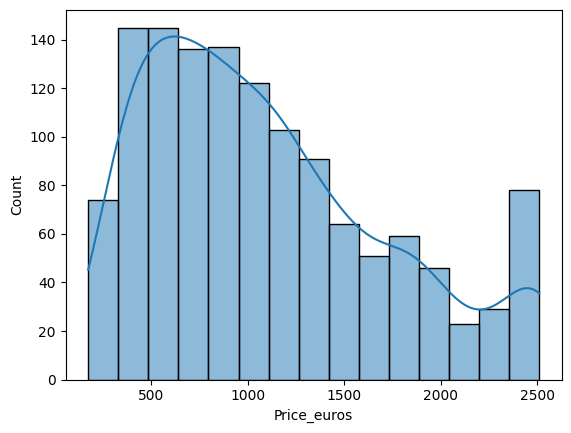

In [ ]:
sns.histplot(df['Price_euros'], kde=True)


#--Split data into training/testing

#--Train models

#--Predict and evaluate

#--hyperparameters

# MODEL TRAINING

1. X = All columns except Price,
  y = Price column you want to predict
2. Data is split:

  80% for training (X_train, y_train)

  20% for testing (X_test, y_test) This helps test how good the model is.
3. Now the model uses the test data (X_test) to predict prices.

#LinearRegression

Creates a Linear Regression model and trains it on your data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Separating Features & Target
X = df_encoded.drop('Price_euros', axis=1)  # All features
y = df_encoded['Price_euros']               # Target (Price)
#Splitting into Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#Evaluting the Model
mae = mean_absolute_error(y_test, y_pred) #MAE	Mean Absolute Error	Average error in predictions
mse = mean_squared_error(y_test, y_pred)  #MSE	Mean Squared Error	Like MAE, but punishes big mistakes more
rmse = np.sqrt(mse)  #RMSE	Root Mean Squared Error	Easier to understand because same unit as price
r2 = r2_score(y_test, y_pred)  #R²	R-Squared Score	Accuracy of model (closer to 1 = better)
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("Train R²:", r2_score(y_train, train_preds))
print("Test R²:", r2_score(y_test, test_preds))

MAE: 218.86
MSE: 79970.77
RMSE: 282.79
Train R²: 0.7873411956613039
Test R²: 0.7630703729300208


This gives you the final results of how well your model predicted the prices.

#GradientBoostRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = r2_score(y_train, gbr.predict(X_train))

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("Train R² Score:", round(train_score * 100, 2), "%")
print("R² Score:", round(r2 * 100, 2), "%")

MAE: 161.64
MSE: 52792.16
RMSE: 229.77
Train R² Score: 89.07 %
R² Score: 84.36 %


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score,
    LeaveOneOut, TimeSeriesSplit)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(gbr, X, y, scoring='r2', cv=kfold)
print("\nK-Fold Cross-Validation R2 scores:", scores)
print("Average R2:", np.mean(scores))


K-Fold Cross-Validation R2 scores: [0.85260589 0.82118872 0.86077519 0.82792556 0.82745881]
Average R2: 0.8379908343955821


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use smaller learning rate and more estimators to reduce overfitting
gbr2 = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.9,
    max_features='sqrt',
    random_state=42
)

gbr2.fit(X_train, y_train)
y_pred = gbr2.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = r2_score(y_train, gbr2.predict(X_train))

# Print scores
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("Train R² Score:", round(train_score * 100, 2), "%")
print("Test R² Score:", round(r2 * 100, 2), "%")

MAE: 154.15
MSE: 45714.54
RMSE: 213.81
Train R² Score: 89.82 %
Test R² Score: 86.46 %


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score,
    LeaveOneOut, TimeSeriesSplit)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(gbr2, X, y, scoring='r2', cv=kfold)
print("\nK-Fold Cross-Validation R2 scores:", scores)
print("Average R2:", np.mean(scores))


K-Fold Cross-Validation R2 scores: [0.86842594 0.83326446 0.86779154 0.83477822 0.85073164]
Average R2: 0.8509983612712307


In [ ]:
# Choose a specific row from the test set (change index to try others)
index = 25

# Get the features for that row
sample_input = X_test.iloc[[index]]

# Predict using the trained model
predicted_price = gbr2.predict(sample_input)[0]

# Get the actual price from y_test
actual_price = y_test.iloc[index]

# Show comparison
print("Laptop Features:")
display(sample_input)

print(f"Predicted Price: €{round(predicted_price, 2)}")
print(f"Actual Price:    €{round(actual_price, 2)}")
print(f"Difference:      €{round(abs(predicted_price - actual_price), 2)}")

Laptop Features:


,Inches,Ram,Weight,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,HDD,...,Cpu_Type_AMD E2,Cpu_Type_AMD Other,Cpu_Type_Intel Atom,Cpu_Type_Intel Celeron,Cpu_Type_Intel Other,Cpu_Type_Intel Pentium,Cpu_Type_Intel i3,Cpu_Type_Intel i5,Cpu_Type_Intel i7,Cpu_Type_Other
44,17.3,12.0,2.77,1.6,1,0,1920,1080,127.34,1000,...,False,False,False,False,False,False,False,True,False,False


✅ Predicted Price: €961.51
🎯 Actual Price:    €999.0
📉 Difference:      €37.49


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Example: true and predicted labels
y_true = [0, 1, 0, 1, 0, 1, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Model
gbr = GradientBoostingRegressor(random_state=42)

# Randomized Search CV (faster than GridSearchCV)
search = RandomizedSearchCV(
    gbr,
    param_distributions=param_grid,
    n_iter=50,  # number of combinations to try
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
search.fit(X_train, y_train)
train_r2 = r2_score(y_train, rfr.predict(X_train))

# Best hyperparameters
print("Best Hyperparameters:", search.best_params_)
print("Train R²:", round(train_r2 * 100, 2), "%")
print("Best R2 Score:", round(search.best_score_ * 100, 2), "%")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train R²: 91.8 %
Best R2 Score: 85.72 %
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05}


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_depth=15,min_samples_split=8,max_features=8,random_state=42)

rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
train_r2 = r2_score(y_train, rfr.predict(X_train))

print("Random Forest Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Train R²:", round(train_r2 * 100, 2), "%")
print("Test R²:", round(r2 * 100, 2), "%")

Random Forest Evaluation:
MAE: 172.41710810898402
MSE: 55887.103200129895
RMSE: 236.4045329517391
Train R²: 91.8 %
Test R²: 83.44 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [300,350,400,450,500],
    'max_depth': [12, 13,14, 15],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [2,3,4],
    'max_features': ['sqrt', 8]
}

# Base model
rfr2= RandomForestRegressor(random_state=42)

# Grid Search CV
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_train, y_train)

# Best model assigned to rfr2
rfr2 = grid_search.best_estimator_

# Predict
y_pred = rfr2.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, rfr2.predict(X_train))

# Output
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Train R²:", round(train_r2 * 100, 2), "%")
print("Test R²:", round(r2 * 100, 2), "%")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits

✅ Best Hyperparameters: {'max_depth': 14, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 500}
Train R²: 89.48 %
Test R²: 82.58 %
MAE: 178.73
RMSE: 242.49


In [ ]:
import pandas as pd

# Choose a specific row from the test set (change index to try others)
index = 25

# Get the features for that row
sample_input = X_test.iloc[[index]]

# Predict using the trained model
predicted_price = rfr.predict(sample_input)[0]

# Get the actual price from y_test
actual_price = y_test.iloc[index]

# Show comparison
print("Laptop Features:")
display(sample_input)

print(f"Predicted Price: €{round(predicted_price, 2)}")
print(f"Actual Price:    €{round(actual_price, 2)}")
print(f"Difference:      €{round(abs(predicted_price - actual_price), 2)}")


Laptop Features:


,Inches,Ram,Weight,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,HDD,...,Cpu_Type_AMD E2,Cpu_Type_AMD Other,Cpu_Type_Intel Atom,Cpu_Type_Intel Celeron,Cpu_Type_Intel Other,Cpu_Type_Intel Pentium,Cpu_Type_Intel i3,Cpu_Type_Intel i5,Cpu_Type_Intel i7,Cpu_Type_Other
44,17.3,12.0,2.77,1.6,1,0,1920,1080,127.34,1000,...,False,False,False,False,False,False,False,True,False,False


✅ Predicted Price: €1057.2
🎯 Actual Price:    €999.0
📉 Difference:      €58.2


#XGBregressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=4,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)
train_r2 = r2_score(y_train, xgb.predict(X_train))

print("XGBoost Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Train R²:", round(train_r2 * 100, 2), "%")
print("Test R²:", round(r2 * 100, 2), "%")

XGBoost Evaluation:
MAE: 149.08648934620825
MSE: 48555.79759137846
RMSE: 220.35380094606597
Train R²: 98.13 %
Test R²: 85.61 %


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can try different values like 3, 7, 10
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#train_r2 = r2_score(y_train, knn.predict(X_train))



print("KNN Results:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2 * 100, 2), "%")
#print("Train R²:", round(train_r2 * 100, 2), "%")

KNN Results:
MAE: 199.69
RMSE: 270.32
R² Score: 78.35 %


# MODELS COMPARISON

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=3,
        min_samples_split=4, min_samples_leaf=2,
        subsample=0.9, max_features='sqrt', random_state=42
    ),"XGBoost": XGBRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=4,
        subsample=0.9, colsample_bytree=0.8, random_state=42,
        verbosity=0
    ),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "Train R² (%)": round(r2_train * 100, 2),
        "Test R² (%)": round(r2_test * 100, 2),
        "RMSE": round(rmse, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test R² (%)", ascending=False)

# Display
print("\nModel Comparison (Train & Test R², RMSE):")
print(results_df.to_string(index=False))



Model Comparison (Train & Test R², RMSE):
            Model   RMSE  Train R² (%)  Test R² (%)
          XGBoost 213.60         95.38        86.48
Gradient Boosting 213.81         89.82        86.46
    Random Forest 229.93         97.66        84.34
Linear Regression 282.79         78.73        76.31
              KNN 325.29         82.71        68.65


# CONCLUSION
1. In this project, we successfully built a laptop price prediction system using machine learning.
2. We started by cleaning and preparing the data, then tried different regression models.
3. Among them, Gradient Boosting Regressor gave the best results with high accuracy.
4. We evaluated the model using metrics like R² score, MAE, and RMSE, and finally deployed it as a web app using Streamlit.
5. This tool can help users estimate a fair price for laptops based on their specifications, making pricing decisions easier for both buyers and sellers.